In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


In [10]:
# import datasets
iris = pd.read_csv('../data/Iris.csv', names=['id', 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

   id  sepal_length  sepal_width  petal_length  petal_width        class
0   1           5.1          3.5           1.4          0.2  Iris-setosa
1   2           4.9          3.0           1.4          0.2  Iris-setosa
2   3           4.7          3.2           1.3          0.2  Iris-setosa
3   4           4.6          3.1           1.5          0.2  Iris-setosa
4   5           5.0          3.6           1.4          0.2  Iris-setosa


In [11]:
wineReviews = pd.read_csv('../data/winemag-data-130k-v2.csv', index_col=0)
print(wineReviews.head())

    country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN

########################################

---
              MatPlotLib 
---


########################################



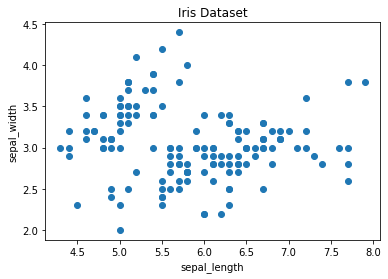

In [12]:
# Scatter Plot

# create a figure and axis
figure, axis = plt.subplots()

# scatter the sepal_length against the sepal_width
axis.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
axis.set_title('Iris Dataset')
axis.set_xlabel('sepal_length')
axis.set_ylabel('sepal_width')

plt.show()

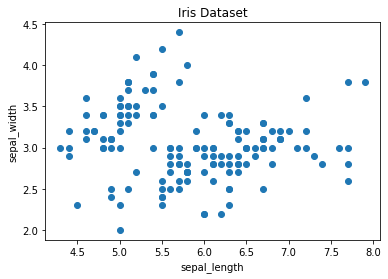

In [13]:
# Scatter Plot

# create a figure and axis
figure, axis = plt.subplots()

# scatter the sepal_length against the sepal_width
axis.scatter(iris['sepal_length'], iris['sepal_width'])
# set a title and labels
axis.set_title('Iris Dataset')
axis.set_xlabel('sepal_length')
axis.set_ylabel('sepal_width')
plt.show()

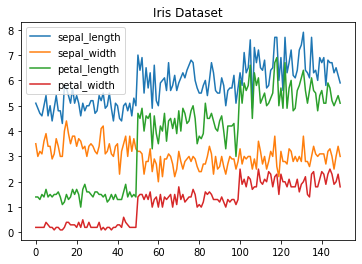

In [14]:
# Line chart

# get columns
columns = iris.columns.drop(['class', 'id'])
# create x axis data
xData = range(0, iris.shape[0])
# create figure and axis
figure, axis = plt.subplots()
# plot each column
for column in columns:
    axis.plot(xData, iris[column])
# set title and legend
axis.set_title('Iris Dataset')
axis.legend(columns)

plt.show()

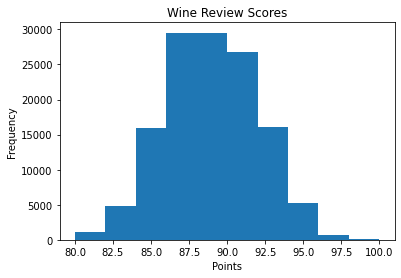

In [15]:
# Histogram

# create figure and axis
figure, axis = plt.subplots()
# plot histogram
axis.hist(wineReviews['points'])
# set title and labels
axis.set_title('Wine Review Scores')
axis.set_xlabel('Points')
axis.set_ylabel('Frequency')
plt.show()

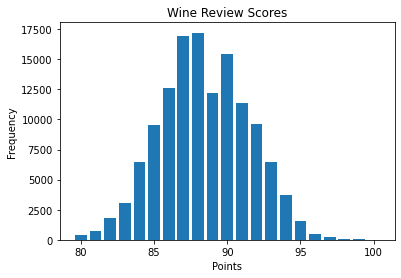

In [16]:
# Bar chart

# create a figure and axis 
figure, axis = plt.subplots() 
# count the occurrence of each class 
data = wineReviews['points'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
axis.bar(points, frequency) 
# set title and labels 
axis.set_title('Wine Review Scores') 
axis.set_xlabel('Points') 
axis.set_ylabel('Frequency')

plt.show()

########################################


---

                Pandas 

---


########################################

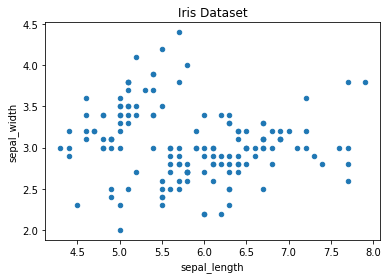

In [17]:
# Scatter plot

iris.plot.scatter(x='sepal_length', y='sepal_width', title='Iris Dataset')
plt.show()

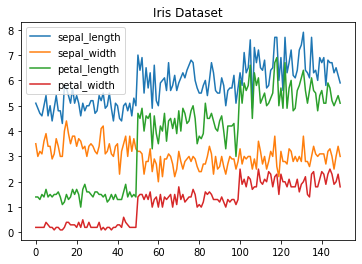

In [18]:
# Line chart

iris.drop(['class','id'], axis=1).plot.line(title='Iris Dataset')
plt.show()

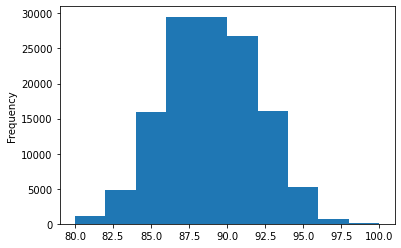

In [19]:
# Histogram 1

wineReviews['points'].plot.hist()
plt.show()

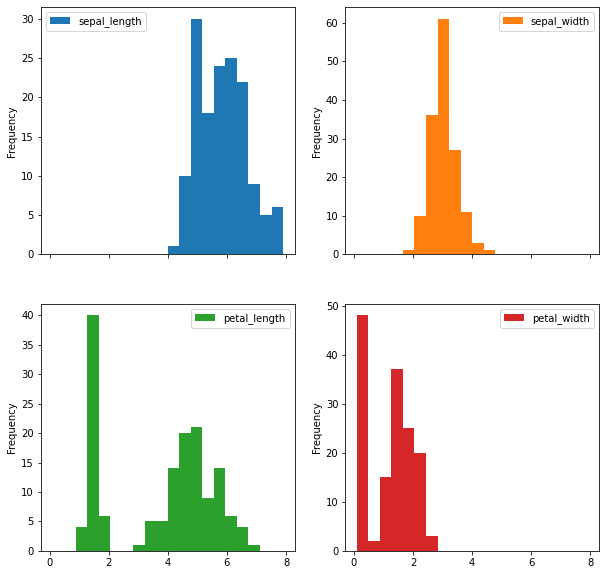

In [20]:
# Histogram 2

iris.drop(['id','class'], axis=1).plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
plt.show()


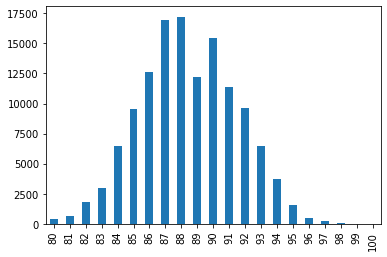

In [21]:
# Bar charts 1

wineReviews['points'].value_counts().sort_index().plot.bar()
plt.show()

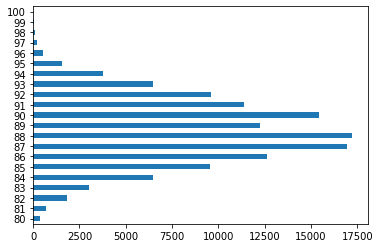

In [22]:
# Bar charts 2

wineReviews['points'].value_counts().sort_index().plot.barh()
plt.show()

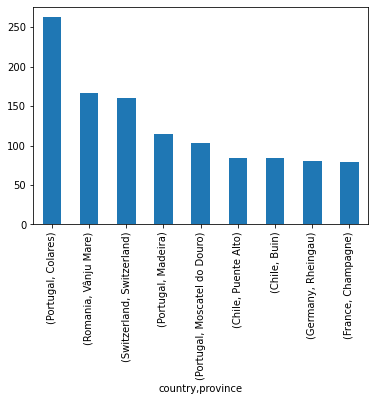

In [23]:
# Bar charts 3

wineReviews.groupby(["country", "province"]).price.mean().sort_values(ascending=False)[:9].plot.bar()
plt.show()

########################################


---
                Seaborn 
---

########################################

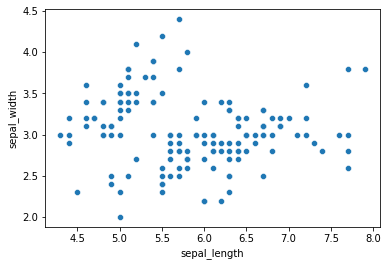

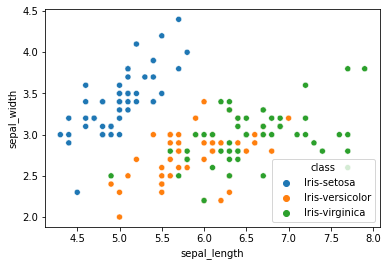

In [24]:
# Scatter plot

plt.figure()
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)
plt.figure()
sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)

plt.show()

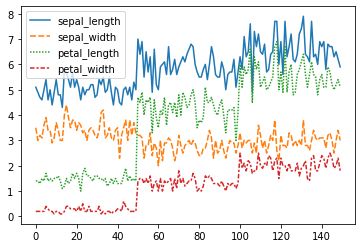

In [25]:
# Line chart

sns.lineplot(data=iris.drop(['class', 'id'], axis=1))
plt.show()

C:\Python38\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


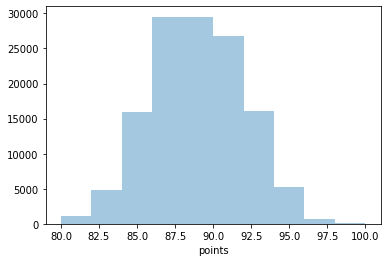

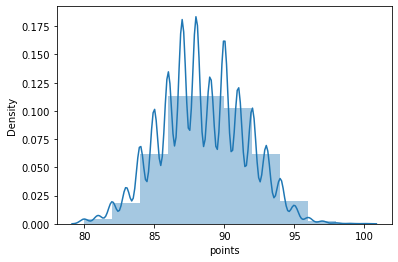

In [26]:
# Histogram

plt.figure()
sns.distplot(wineReviews['points'], bins=10, kde=False)
plt.figure()
sns.distplot(wineReviews['points'], bins=10, kde=True)

plt.show()


C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


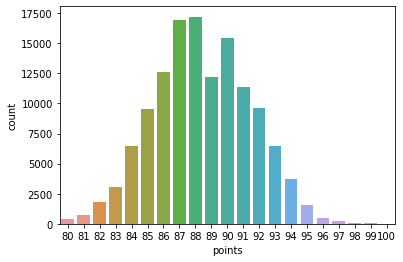

In [27]:
# Bar chart

sns.countplot(wineReviews['points'])
plt.show()

C:\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


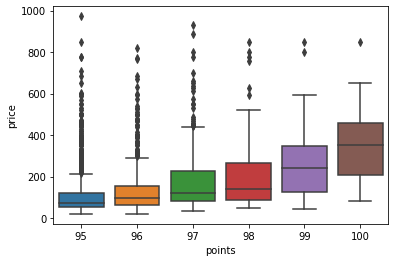

In [28]:
# Box plots

df = wineReviews[(wineReviews['points']>=95) & (wineReviews['price']<1000)]
sns.boxplot('points', 'price', data=df)
plt.show()

########################################


---

               Heat Map 

---


########################################

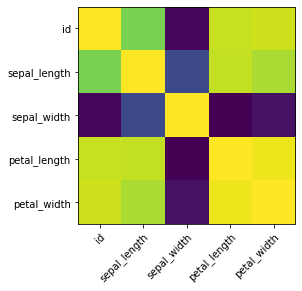

In [29]:
# get correlation matrix
corr = iris.corr()
figure, axis = plt.subplots()
# create heatmap
im = axis.imshow(corr.values)

# set labels
axis.set_xticks(np.arange(len(corr.columns)))
axis.set_yticks(np.arange(len(corr.columns)))
axis.set_xticklabels(corr.columns)
axis.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(axis.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.show()


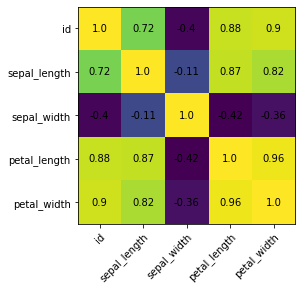

In [30]:
# Annotations

# get correlation matrix
corr = iris.corr()
figure, axis = plt.subplots()
# create heatmap
im = axis.imshow(corr.values)

# set labels
axis.set_xticks(np.arange(len(corr.columns)))
axis.set_yticks(np.arange(len(corr.columns)))
axis.set_xticklabels(corr.columns)
axis.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(axis.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(corr.columns)):
    for j in range(len(corr.columns)):
        text = axis.text(j, i, np.around(corr.iloc[i, j], decimals=2),
                       ha="center", va="center", color="black")
        
plt.show()

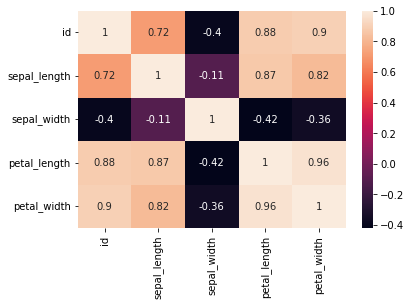

In [31]:
# Anotations

sns.heatmap(iris.corr(), annot=True)
plt.show()

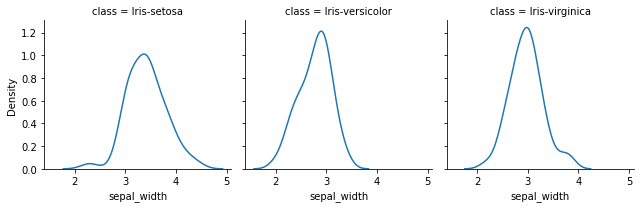

In [32]:
#Faceting

g = sns.FacetGrid(iris, col='class')
g = g.map(sns.kdeplot, 'sepal_width')
plt.show()

########################################
---
              PairPlot 
---
########################################

<ipython-input-33-6761b2b759d4>:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  scatter_matrix(iris.drop(['id'], axis=1), alpha=1, ax=axis)


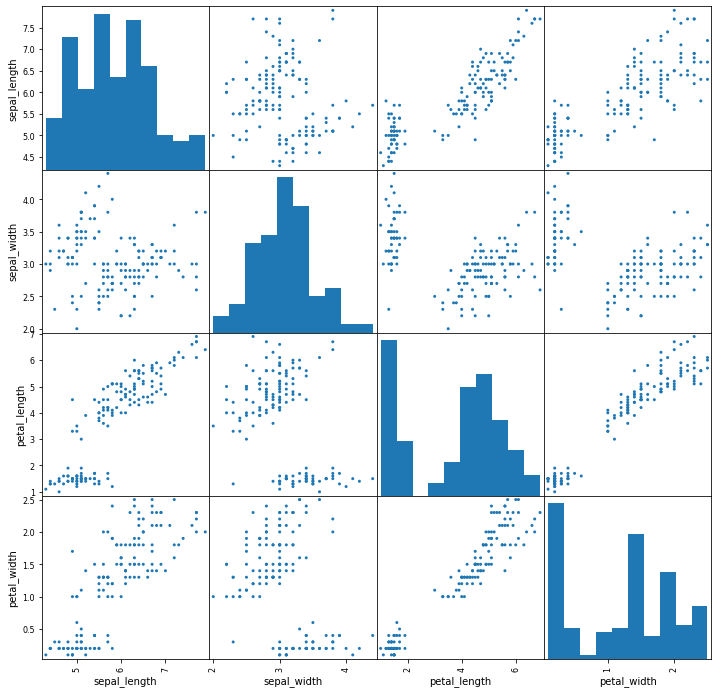

In [33]:
figure, axis = plt.subplots(figsize=(12,12))
scatter_matrix(iris.drop(['id'], axis=1), alpha=1, ax=axis)
plt.show()

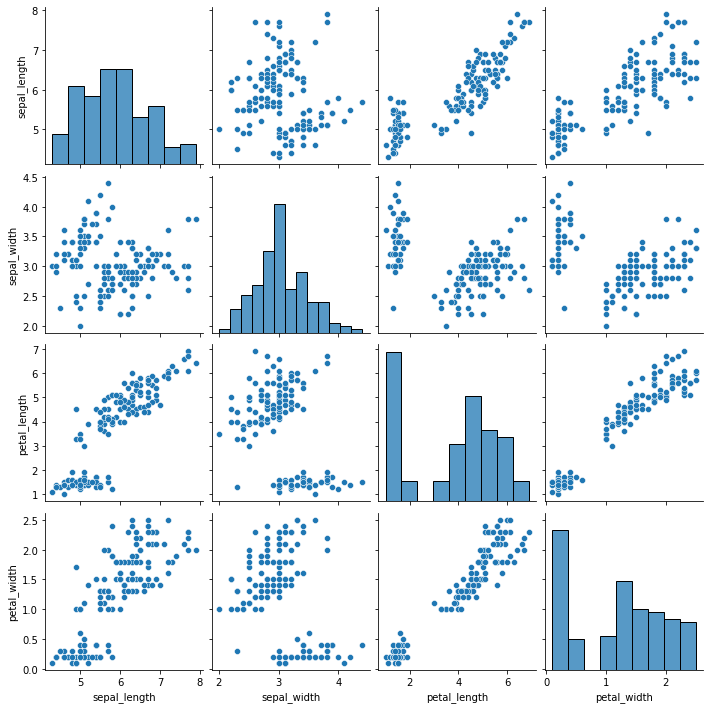

In [34]:
sns.pairplot(iris.drop(['id'], axis=1))
plt.show()